# First Neural Networks with Pytorch

In [28]:
import numpy as np
import pandas as pd

import torch
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns

## By Scratch

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c_t = torch.tensor(t_c)
t_u_t = torch.tensor(t_u)

In [3]:
data = [{'temperature': temperature, 'unknown': unknown} for temperature, unknown in zip(t_c, t_u)]
df = pd.DataFrame(data)
df

,temperature,unknown
0,0.5,35.7
1,14.0,55.9
2,15.0,58.2
3,28.0,81.9
4,11.0,56.3
5,8.0,48.9
6,3.0,33.9
7,-4.0,21.8
8,6.0,48.4
9,13.0,60.4


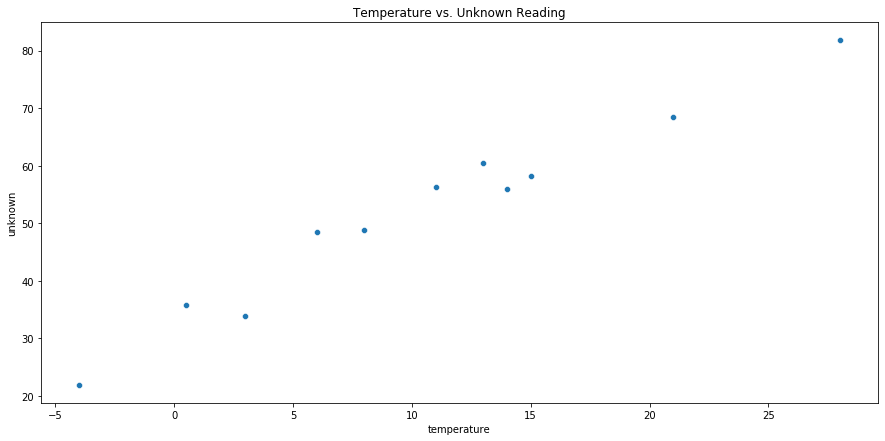

In [4]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.title('Temperature vs. Unknown Reading')
sns.scatterplot(data=df, x='temperature', y='unknown')

Relationship appears to be linear, so we can create a linear function to try and express the pattern we are seeing

In [5]:
def model(t_u, w, b): # A linear function. Weights = how much input influences output, bias = what output would be for input 0
    return w * t_u + b

In [6]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [7]:
w = torch.ones(())
b = torch.zeros(())

pred_t = model(t_u_t, w, b)
pred_t

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [8]:
loss = loss_fn(pred_t, t_c_t)
loss

tensor(1763.8848)

In [9]:
def der_loss_fn(pred_t, actual_t):
    return 2 * (pred_t - actual_t) / pred_t.size(0)

In [10]:
def der_model_der_w(t_u, w, b):
    return t_u

In [11]:
def der_model_der_b(t_u, w, b):
    return 1.0

In [12]:
def gradient_descent(t_u, t_c, t_p):
    der_loss_der_pred_t = der_loss_fn(t_p, t_c)
    der_loss_der_w = der_loss_der_pred_t * t_u
    der_loss_der_b = der_loss_der_pred_t * 1
    return torch.stack([der_loss_der_w.sum(), der_loss_der_b.sum()])

In [13]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # <1>

In [14]:
def training_loop(epochs, lr, params, t_u, t_c):
    for epoch in range(1, epochs + 1):
        w, b = params
        
        pred_t = model(t_u, w, b)
        loss = loss_fn(pred_t, t_c)
        grad = gradient_descent(t_u, t_c, pred_t)
        
        params = params - lr * grad
        
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    return params

In [15]:
training_loop(epochs=100, lr=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_u_t, t_c=t_c_t)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 5802484.500000
Epoch 3, Loss 19408029696.000000
Epoch 4, Loss 64915905708032.000000
Epoch 5, Loss 217130525461053440.000000
Epoch 6, Loss 726257583152928129024.000000
Epoch 7, Loss 2429183416467662896627712.000000
Epoch 8, Loss 8125122549611731432050262016.000000
Epoch 9, Loss 27176882120842590626938030653440.000000
Epoch 10, Loss 90901105189019073810297959556841472.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

In [16]:
training_loop(epochs=100, lr=1e-4, params=torch.tensor([1.0, 0.0]), t_u=t_u_t, t_c=t_c_t)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095881
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092216
Epoch 25, Loss 29.091301
Epoch 26, Loss 29.090385
Epoch 27, Loss 29.089464
Epoch 28, Loss 29.088551
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086714
Epoch 31, Loss 29.085804
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083967
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081221
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079390
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077562
Epoch 

tensor([ 0.2327, -0.0438])

In [17]:
t_un = 0.1 * t_u_t

In [18]:
params = training_loop(epochs=100, lr=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_un, t_c=t_c_t)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

In [19]:
params = training_loop(epochs=5000, lr=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_un, t_c=t_c_t)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

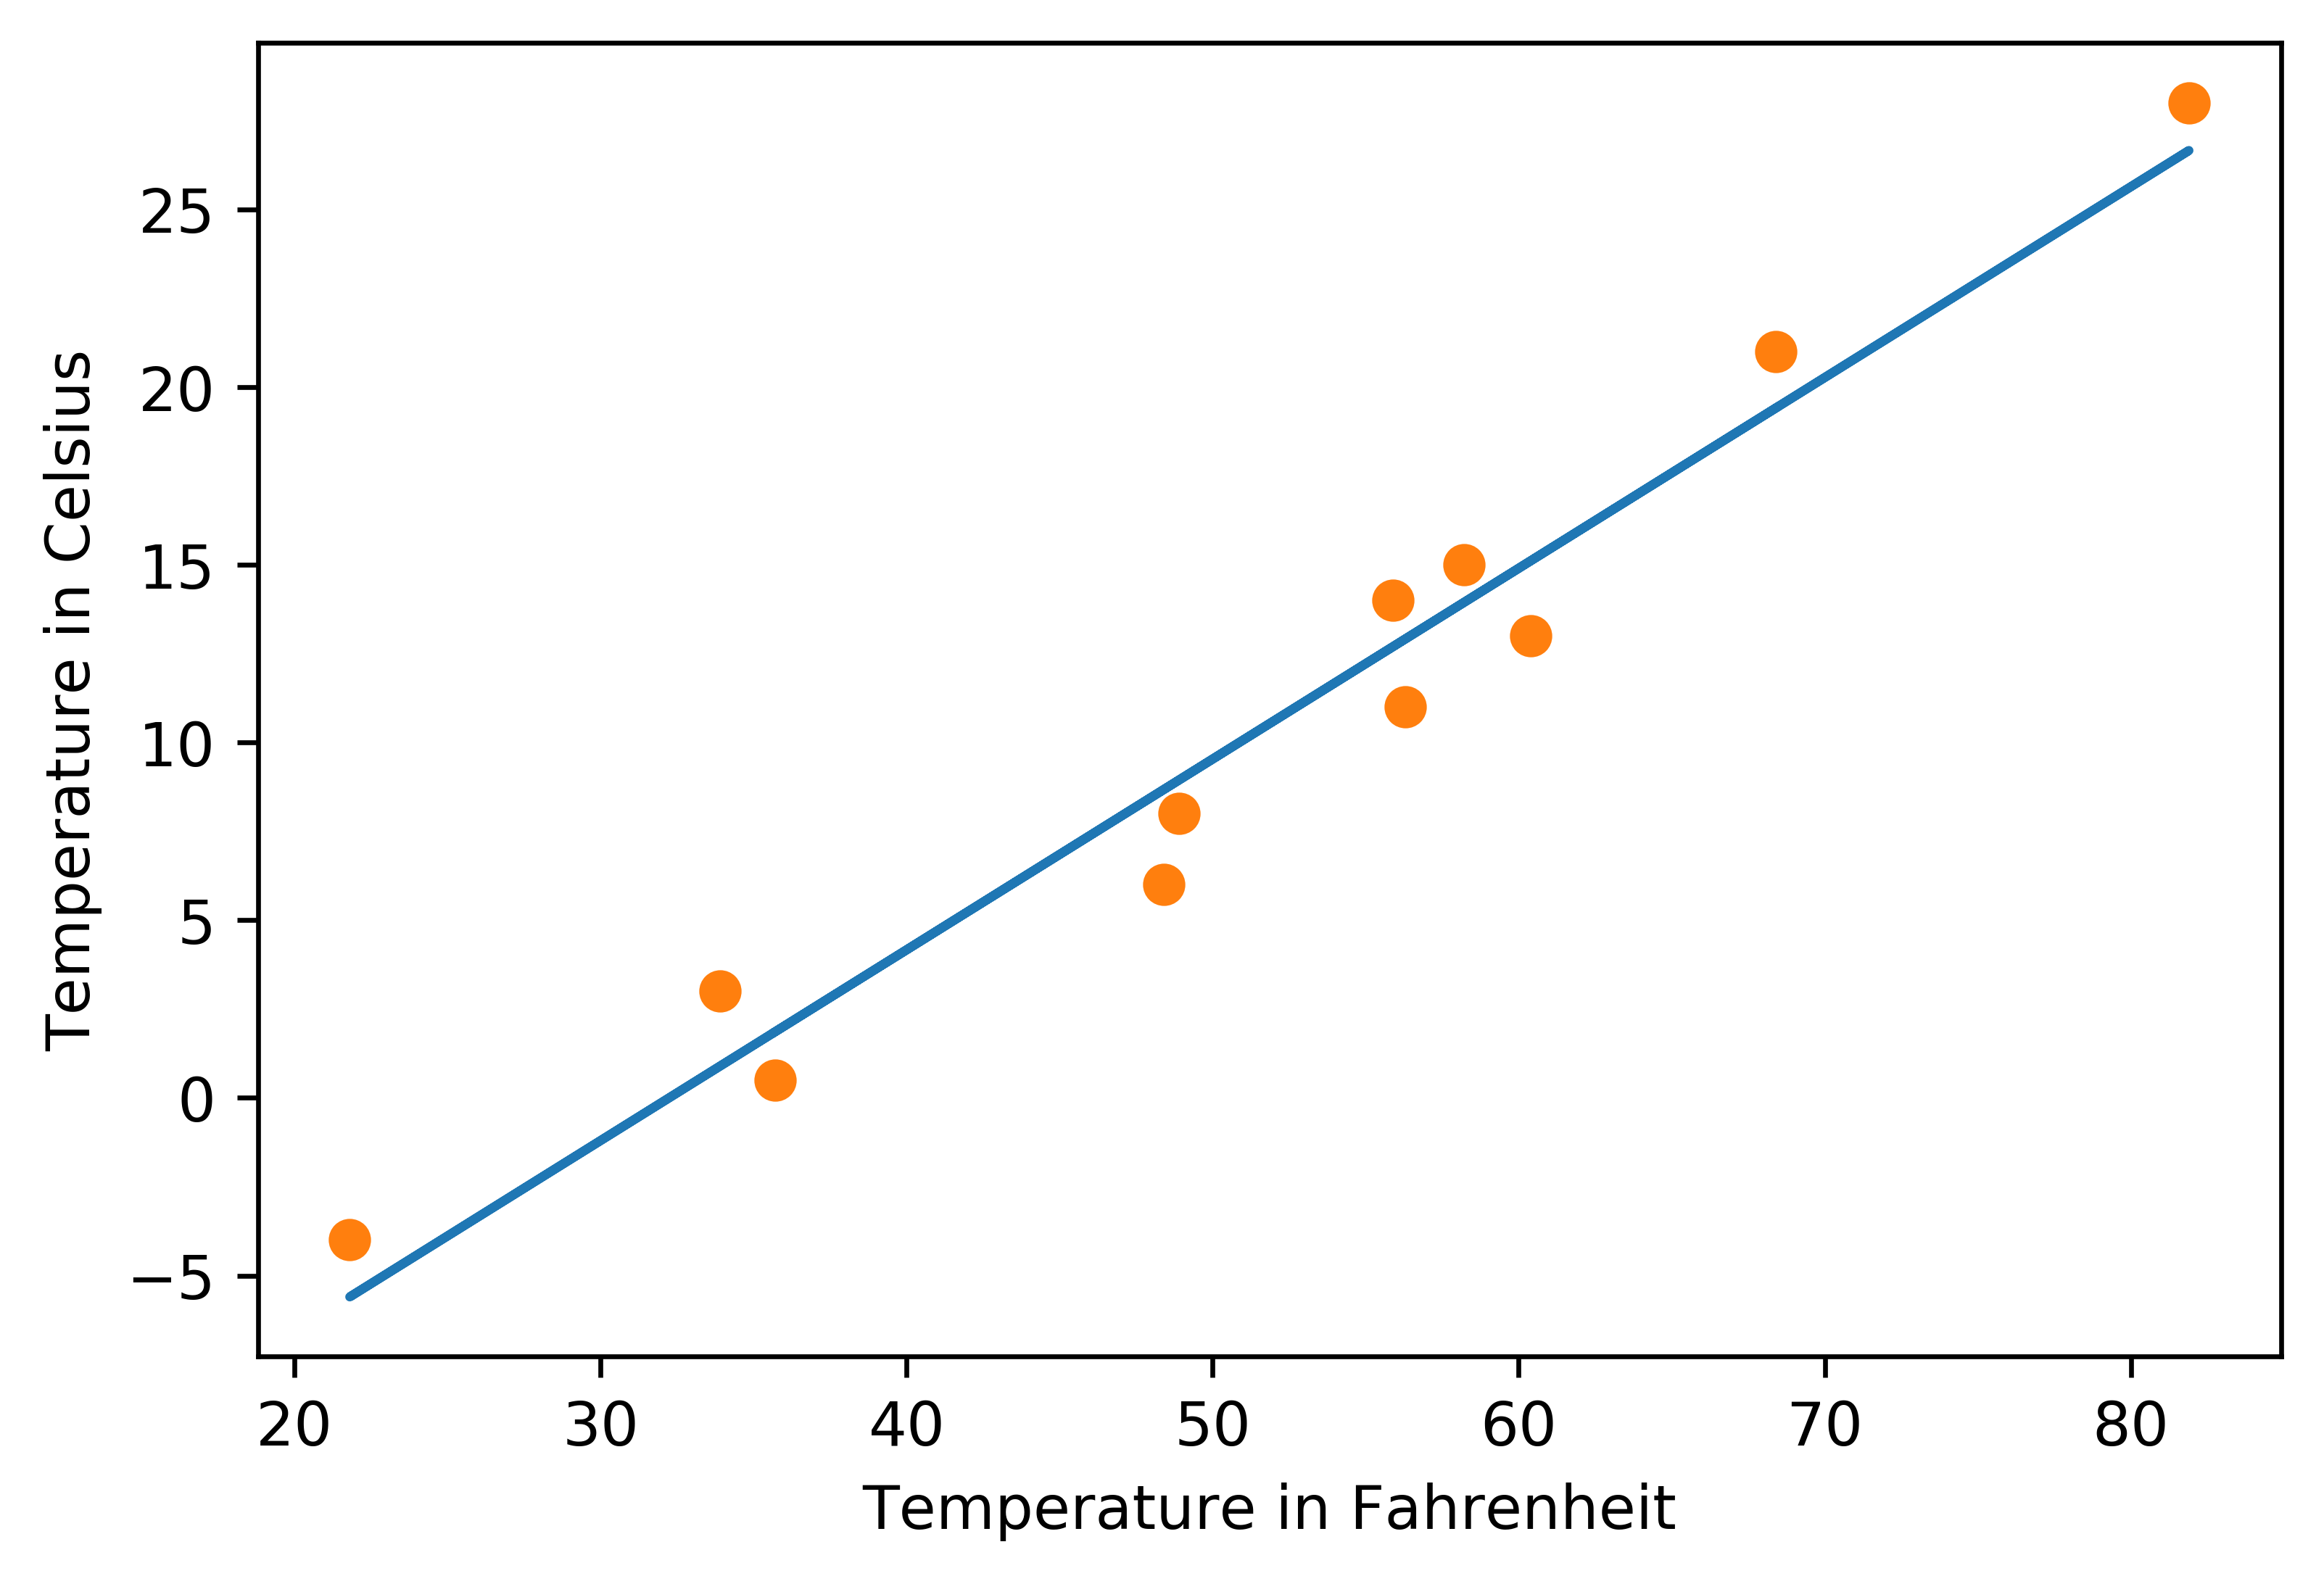

In [20]:
pred_t = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel('Temperature in Fahrenheit')
plt.ylabel('Temperature in Celsius')
plt.plot(t_u, pred_t.detach().numpy())
plt.plot(t_u, t_c_t.numpy(), 'o')
plt.show()

## Using Autograd

In [21]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [22]:
params.grad is None

True

In [23]:
loss = loss_fn(model(t_u_t, *params), t_c_t)
loss.backward()
params.grad

tensor([4517.2969,   82.6000])

In [24]:
if params.grad is not None:
    params.grad.zero_()

In [26]:
def training_loop(epochs, lr, params, t_u, t_c):
    for epoch in range(1, epochs - 1):
        if params.grad is not None:
            params.grad.zero_()
        
        pred_t = model(t_u, *params)
        loss = loss_fn(pred_t, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= lr * params.grad
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    return params

In [27]:
training_loop(epochs=5000, lr=1e-2, params=torch.tensor([1.0, 0.0], requires_grad=True), t_u=t_un, t_c=t_c_t)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652


tensor([  5.3671, -17.3012], requires_grad=True)

In [29]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [30]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
lr = 1e-5
optimizer = optim.SGD([params], lr=lr)

In [31]:
pred_t = model(t_u_t, *params)
loss = loss_fn(pred_t, t_c_t)
loss.backward()

optimizer.step()

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [32]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
lr = 1e-2
optimizer = optim.SGD([params], lr=lr)

pred_t = model(t_un, *params)
loss = loss_fn(pred_t, t_c_t)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [33]:
def training_loop(epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, epochs + 1):
        pred_t = model(t_u, *params)
        loss = loss_fn(pred_t, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    return params

In [36]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
lr = 1e-2
optimizer = optim.SGD([params], lr=lr)

training_loop(epochs=5000, optimizer=optimizer, params=params, t_u=t_un, t_c=t_c_t)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [37]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
lr = 1e-1
optimizer = optim.Adam([params], lr=lr)

training_loop(epochs=2000, optimizer=optimizer, params=params, t_u=t_u_t, t_c=t_c_t)

Epoch 500, Loss 7.612900
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928579
Epoch 2000, Loss 2.927644


tensor([  0.5367, -17.3021], requires_grad=True)

In [43]:
num_samples = t_u_t.shape[0]
num_val = int(0.2 * num_samples)

shuffled_indices = torch.randperm(num_samples)

train_indices = shuffled_indices[:-num_val]
val_indices = shuffled_indices[-num_val:]

train_indices, val_indices

(tensor([ 7,  4,  1,  0,  9,  8,  2,  6, 10]), tensor([5, 3]))

In [46]:
train_t_u = t_u_t[train_indices]
train_t_c = t_c_t[train_indices]

val_t_u = t_u_t[val_indices]
val_t_c = t_c_t[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [50]:
def training_loop(epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f'Epoch {epoch}, Training loss {train_loss.item():.4f},'
                  f' Validation loss {val_loss.item():.4f}')
    return params

In [51]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
lr = 1e-2
optimizer = optim.SGD([params], lr=lr)

training_loop(epochs=3000, optimizer=optimizer, params=params, train_t_u=train_t_un, val_t_u=val_t_un, train_t_c=train_t_c, val_t_c=val_t_c)

Epoch 1, Training loss 53.5444, Validation loss 201.0541
Epoch 2, Training loss 30.5667, Validation loss 115.4398
Epoch 3, Training loss 25.5510, Validation loss 85.4571
Epoch 500, Training loss 7.7695, Validation loss 21.5329
Epoch 1000, Training loss 4.1600, Validation loss 9.2849
Epoch 1500, Training loss 3.3756, Validation loss 5.3324
Epoch 2000, Training loss 3.2051, Validation loss 3.8717
Epoch 2500, Training loss 3.1681, Validation loss 3.2738
Epoch 3000, Training loss 3.1600, Validation loss 3.0131


tensor([  5.0943, -16.0027], requires_grad=True)